### 1. Load Modules

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 101)
pd.set_option('display.max_rows', 101)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import ast
import os
import datetime

from wordcloud import WordCloud, STOPWORDS

### 2. Load Data

In [2]:
DATA_PATH = '../data'
df = pd.read_csv(os.path.join(DATA_PATH, 'movies_metadata.csv'))

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# remove rows with incorrect id
df = df[df['id'].apply(lambda x: x.isnumeric())]
df['id'] = df['id'].astype('int')

In [4]:
df.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview popularity  \
0  Led by Woody, Andy's toys live happily in his ...    21.9469   
1  When siblings Judy and Peter discover an encha...    17.0155   
2  A family wedding reignites the ancient feud be...    11.7129   
3  Cheated on, mistreated and stepped on, the wom...    3.85949   
4  Just when George Banks has recovered from his ...    8.38752   

                        poster_path  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
2  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   
3  /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg   
4  /e64sOI48hQXyru7naBFyssKFxVd.jpg   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   

       revenue  runtime                                   spoken_languages  \
0  373554033.0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0    101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0    127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0    106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video  vote_average  vote_count  
0                    Toy Story  False           7.7      5415.0  
1                      Jumanji  False           6.9      2413.0  
2             Grumpier Old Men  False           6.5        92.0  
3            Waiting to Exh

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  object 
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

### 3 Data Wrangling

#### 3.1 Remove useless features

In [6]:
# drop adult
print(df['adult'].value_counts())
df.drop(['adult'], axis=1, inplace=True)

False    45454
True         9
Name: adult, dtype: int64


In [7]:
# drop imdb id
df.drop(['imdb_id'], axis=1, inplace=True)

In [8]:
# drop original title
print(df.loc[df.original_title != df.title, ['original_title','title']].head())
df.drop(['original_title'], axis=1, inplace=True)

                      original_title                      title
28        La Cité des Enfants Perdus  The City of Lost Children
29                         摇啊摇，摇到外婆桥             Shanghai Triad
32  Guillaumet, les ailes du courage           Wings of Courage
57                        Il postino                The Postman
58                  Le confessionnal           The Confessional


#### 3.2 Missing value analysis and create missing indicators

In [9]:
# print missing value percentage
missing_summary = pd.DataFrame(np.round(df.isnull().mean().sort_values(ascending=False)*100,2), columns =['Missing Percentage %'])
missing_summary[missing_summary['Missing Percentage %']>0]

Missing Percentage %
belongs_to_collection                 90.12
homepage                              82.89
tagline                               55.10
overview                               2.10
poster_path                            0.85
runtime                                0.57
release_date                           0.19
status                                 0.18
original_language                      0.02
production_companies                   0.01
popularity                             0.01
vote_count                             0.01
vote_average                           0.01
revenue                                0.01
spoken_languages                       0.01
title                                  0.01
video                                  0.01
production_countries                   0.01
id                                     0.00
genres                                 0.00
budget                                 0.00

In [27]:
# remove vote count and average is null
df = df[(~df['vote_count'].isnull())&(~df['vote_average'].isnull())]

In [10]:
# convert to columns with missing >80% to indicator
df['belongs_to_collection_ind'] = df.belongs_to_collection.notnull()
df['homepage_ind'] = df.homepage.notnull()
df.drop(['belongs_to_collection','homepage'], axis=1, inplace=True)

In [29]:
# print missing value percentage
missing_summary = pd.DataFrame(np.round(df.isnull().mean().sort_values(ascending=False)*100,2), columns =['Missing Percentage %'])
missing_summary[missing_summary['Missing Percentage %']>0]

Missing Percentage %
profit                            88.16
revenue                           83.70
budget                            80.44
tagline                           55.10
poster_path                        0.84
runtime                            0.57
release_date                       0.18
status                             0.18
original_language                  0.02

#### 3.3 Coerce data type

In [11]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['revenue'] = df['revenue'].replace(0, np.nan)
df['profit'] = (df['revenue'] - df['budget']) / df['budget']

### 4 EDA

#### 4.1 Movie title word cloud

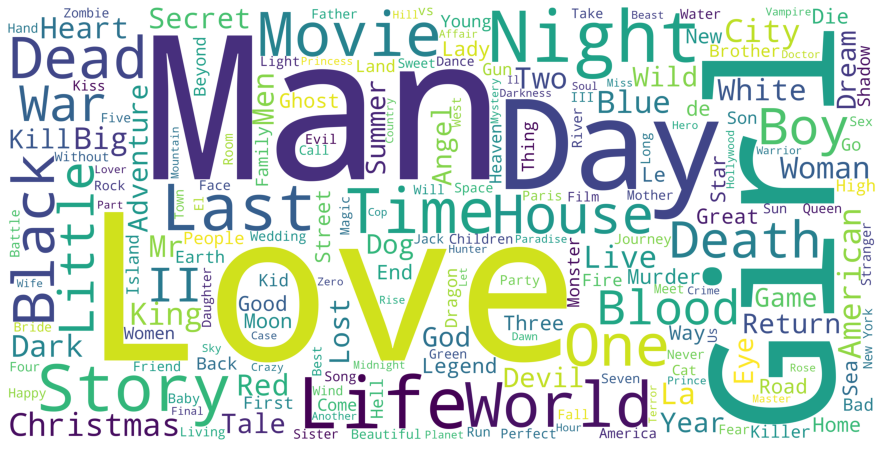

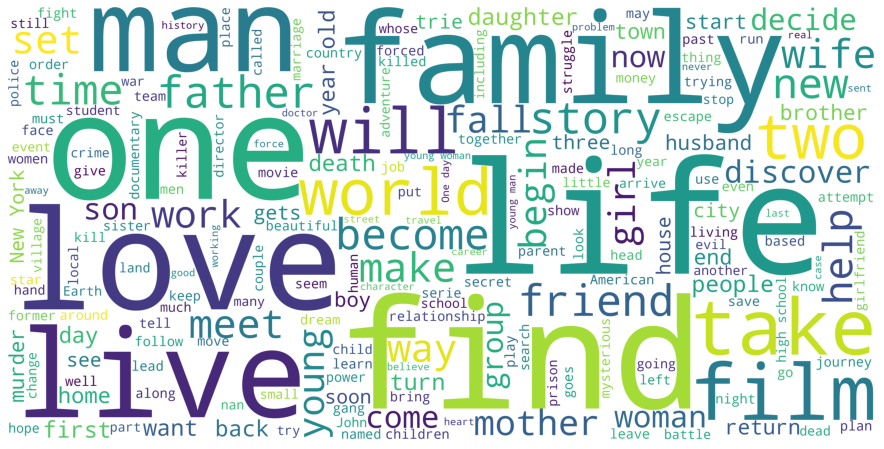

In [12]:
df['title'] = df['title'].astype(str)
df['overview'] = df['overview'].astype(str)

title_corpus = ' '.join(df.title)
overview_corpus = ' '.join(df.overview)

# title
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

# overview
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

#### 4.2 Production countries map

In [13]:
# extract production countries
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [elem['name'] for elem in x] if isinstance(x, list) else [])

In [14]:
# create df: country - num_movies
p_countries = df['production_countries'].apply(pd.Series).stack().reset_index(level=1, drop=True)
p_countries_agg = p_countries.value_counts().reset_index().rename({'index':'country',0:'num_movies'}, axis=1)
# associate country code with country name
countries = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
p_countries_agg['country'] = p_countries_agg.country.replace({'United States of America':'United States','South Korea':'Korea, South', 'North Korea':'Korea, North'})
p_countries_agg = p_countries_agg.merge(countries.rename({'COUNTRY':'country','CODE':'code'},axis=1), on='country', how='left')

In [17]:
# plot number of movie per country
fig = go.Figure(data=go.Choropleth(
    locations = p_countries_agg.code,
    z = p_countries_agg.num_movies,
    text = p_countries_agg.country,
    colorscale = 'Blues',
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Number of Movies',
))

fig.update_layout(
    title_text='Movie Production Countries Map',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig.show()

#### 4.3 Top production companies

In [18]:
# extract production companies
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [elem['name'] for elem in x] if isinstance(x, list) else [])

In [19]:
# create df: company - num_movies
p_companies = df['production_companies'].apply(pd.Series).stack().reset_index(level=1, drop=True)
p_companies = pd.DataFrame(p_companies, columns=['company']).join(df[['title','budget','revenue', 'profit']])
p_companies_agg = p_companies.groupby('company').agg(num_movies = ('title','count'),
                                  avg_budget = ('budget', np.nanmean),
                                  avg_revenue = ('revenue',np.nanmean),
                                  avg_profit = ('profit',np.nanmean),
                                  tot_budget = ('budget',np.nansum),
                                  tot_revenue = ('revenue',np.nansum)
                                  ).sort_values('num_movies', ascending=False).reset_index()

In [20]:
# plot top 20 production companies by number of movies produced
fig = px.bar(p_companies_agg.sort_values('tot_revenue', ascending=False).head(20), 
       x = 'company', 
       y = 'tot_revenue', 
       color = 'avg_revenue', 
       color_continuous_scale=px.colors.sequential.Blues,
       labels = {'num_movie':'number of movies', 'avg_revenue':'average revenue per movie'},
       title = 'Top 20 companies by total revenue')
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)')

#### 4.4 Movies by per original languages

In [278]:
languages = df['original_language'].value_counts().reset_index()
languages.columns = ['language','num_movies']
top_10_languages = languages.language.head(10).values.tolist()
languages.loc[~languages.language.isin(top_10_languages), 'language'] = 'others'
languages_agg = languages.groupby('language').agg(num_movies = ('num_movies','sum')).reset_index()

In [282]:
# plot perc of movies by lanugage
px.pie(languages_agg, values = 'num_movies', names = 'language', color_discrete_sequence=px.colors.qualitative.Set3)

#### 4.5 # Movies produced over time

In [33]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year.astype('Int64')

In [41]:
yearly_summary = df.groupby('year').size().reset_index().rename({0:'num_movies'}, axis=1)
px.line(yearly_summary, x='year',y='num_movies',
       labels = {'num_movies':'number of movies produced'},
       title = 'Number of movies produced over time')

### 5 Save to pkl

In [42]:
df.to_pickle('../output/movies_metadata.pkl')